We are trying to predict a continuous variable (Listening_Time_minutes) using a mix of numeric and categorical inputs.

This is a supervised regression problem

The models we could use:
- Linear Regression or related Generalised models
- Random Forests
- Gradient boost trees
- Neural Networks

## Set up data and create sample dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train = pd.read_csv('train.csv')

# Drop high-cardinality or unhelpful columns
cols_to_drop = ['id', 'Episode_Title']  # High cardinality / text
train = train.drop(columns=cols_to_drop)

# Drop rows with missing values for simplicity (we can impute later)
train = train.dropna()

# Sample 10% to make the linear model faster to train and easier to inspect
train_sample = train.sample(frac=0.1, random_state=42)


## Feature Engineering + One-Hot Encoding

Encode categorical variables using One-Hot Encoding

Keep numeric features as they are (no scaling required here)

Prepare X (features) and y (target) for modeling

Which columns are categorical?
From earlier, we know:

Categorical:
Podcast_Name (can drop or encode later if needed)
Genre
Publication_Day
Publication_Time
Episode_Sentiment

Numeric:
Episode_Length_minutes
Host_Popularity_percentage
Guest_Popularity_percentage
Number_of_Ads

In [8]:
# Target column
y = train_sample['Listening_Time_minutes']

# Drop target from features
X = train_sample.drop(columns=['Listening_Time_minutes'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Sanity check
print("X shape:", X_encoded.shape)
X_encoded.head()


X shape: (53905, 71)


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,...,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
272136,19.74,59.66,59.68,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
364280,37.22,59.46,98.61,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
546101,113.98,81.64,32.83,2.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
399060,5.84,53.60,76.69,2.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3328,54.11,78.62,66.83,1.0,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True


## Fitting a linear regression model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_encoded, y)

# Predict on the training sample
y_pred = lr.predict(X_encoded)

# Evaluate performance
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 10.72
MAE: 8.25
R²: 0.8442


C:\Users\james\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df.head(10)


,Feature,Coefficient
52,Genre_Education,-5.230991
43,Podcast_Name_Study Sessions,4.508447
14,Podcast_Name_Educational Nuggets,4.476808
4,Podcast_Name_Brain Boost,4.313080
29,Podcast_Name_Learning Lab,3.840352
51,Genre_Comedy,-3.130992
18,Podcast_Name_Funny Folks,2.849153
7,Podcast_Name_Comedy Corner,2.750909
8,Podcast_Name_Crime Chronicles,2.640969
27,Podcast_Name_Joke Junction,2.545323


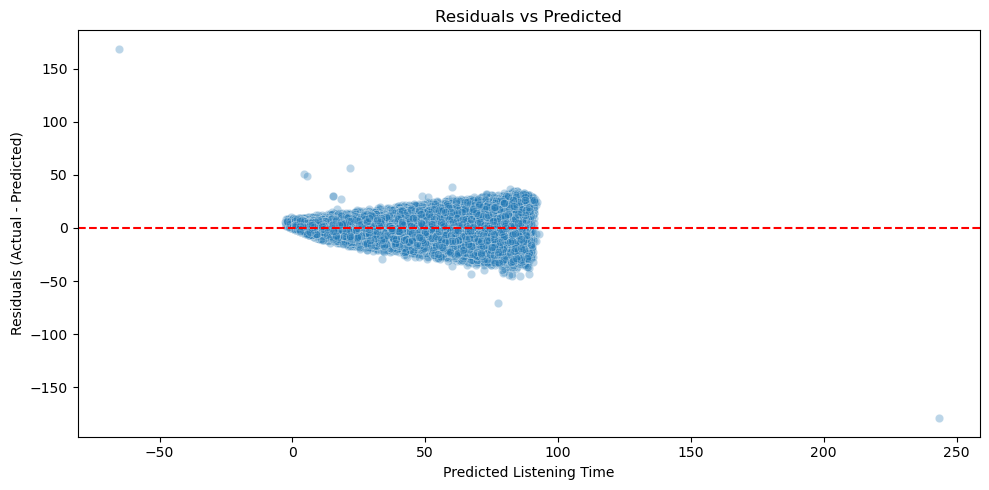

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Listening Time')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()


To build a foundational understanding of the data structure and the key drivers of Listening_Time_minutes, a simple Linear Regression model was fitted on a 10% sample of the training dataset (after dropping missing values and high-cardinality text columns such as Episode_Title and id).

Feature Preparation
Categorical variables were one-hot encoded using pd.get_dummies() with drop_first=True to avoid multicollinearity.

Numerical features were kept as-is.

The target variable was Listening_Time_minutes.

The model explains approximately 84% of the variance in listening time, which is strong for a simple linear model. However, this may be somewhat inflated due to the high dimensionality introduced by encoding Podcast_Name.

Coefficient Insights
Genre_Education and Genre_Comedy showed negative coefficients, indicating that educational and comedic content tends to be associated with shorter listening times relative to the baseline genre.

Several podcast-specific dummies (e.g., Podcast_Name_Study Sessions) had large positive coefficients, suggesting strong podcast-level effects — though these are likely overfitted due to being uniquely tied to individual entries.

Residual Analysis
The residuals were centered around zero, but showed a funnel-shaped pattern, indicating heteroskedasticity (greater prediction error for longer episodes). This suggests that the linear model does not fully capture the complexity of the relationships in the data — especially for long-form content or outliers.

## Summary

This linear regression model served as a strong baseline to:

Understand feature contributions

Identify early relationships in the data

Highlight the need for a more flexible model

In the next step, a nonlinear model such as Random Forest will be explored to better capture interactions and nonlinearities.